In [1]:
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ajl0618\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ajl0618\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import pandas as pd
import pyodbc
import numpy as np
import os

In [3]:
spark = SparkSession.builder.appName("PBPPlanBuilder").getOrCreate()

In [4]:
#system parameters\
PBP_SOURCE_FOLDER = 'PBP_Benefits_2024/'
DR_TARGET_FOLDER = 'PBP_Benefits_2024_Results/'
TARGET_BENEFIT_SERVICE_CODES = ['18a1', '18b1']
SERVICE_COLUMNS = {
    '18a1':{
        'pbp_b18a_copay_amt_rht': 'copay_min',
        'pbp_b18a_copay_amt_max_rht': 'copay_max'
    }, 
    '18b1': {
        'pbp_b18b_copay_at_min_amt': 'copay_min',
        'pbp_b18b_copay_at_max_amt': 'copay_max',
    }
}

In [5]:
#List of utility functions
def write_to_csv_file(df, file_name):
    pandas_df = df.toPandas()
    pandas_df.to_csv(DR_TARGET_FOLDER + file_name + '.csv', index=False)

def read_pd_from_csv_file(file_name):
    return pd.read_csv(DR_TARGET_FOLDER + file_name + '.csv')

def write_pd_to_csv(df, file_name):
    df.to_csv(DR_TARGET_FOLDER + file_name + '.csv', index=False)

In [6]:
#read sample data files
#rename columns to synch data columns
def rename_column_name(service_code, column_name):
    if column_name.startswith('pbp_b'):
        if service_code in SERVICE_COLUMNS:
            if column_name in SERVICE_COLUMNS[service_code]:
                return SERVICE_COLUMNS[service_code][column_name]
        return '_'.join(column_name.split('_')[2:])
    return column_name

df_samples = []
common_column_names = []
for service_code in TARGET_BENEFIT_SERVICE_CODES:
    df_sample =  pd.read_csv(os.path.join(DR_TARGET_FOLDER, f'PBP_Decision_Tree_Data_Samples_{service_code}.csv'))
    df_sample.rename(columns=lambda x: rename_column_name(service_code, x), inplace=True)
    if len(common_column_names) == 0:
        common_column_names = df_sample.columns
    else:
        common_column_names = df_sample.columns.intersection(common_column_names)
    df_samples.append(df_sample)
#get only common columns
for i in range(len(df_samples)):
    df_samples[i] = df_samples[i][common_column_names]

df_all_samples = pd.concat(df_samples)
df_all_samples.drop_duplicates(inplace=True)
benefits_service_codes = '_'.join(TARGET_BENEFIT_SERVICE_CODES)
write_pd_to_csv(df_all_samples, f'PBP_Decision_Tree_Data_Samples_{benefits_service_codes}')


PermissionError: [Errno 13] Permission denied: 'PBP_Benefits_2024_Results/PBP_Decision_Tree_Data_Samples_18a1_18b1.csv'

: 

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt


In [ ]:
#split dataset in features and target variable
pima = df_all_samples
feature_cols = [x for x in df_all_samples.columns if x != 'Classified_CostShare']
x = pima[feature_cols] # Features
y = pima.Classified_CostShare # Target variable


['Zero Copay', 'NOT COVERED', 'MIN-MAX copay']
['pbp_a_special_need_plan_type', 'pbp_a_dsnp_zerodollar', 'pbp_a_snp_state_cvg_yn', 'bendesc_yn', 'bendesc_ehc', 'maxenr_yn', 'maxenr_amt', 'coins_yn', 'coins_ehc', 'copay_yn', 'copay_ehc', 'copay_min', 'copay_max', 'pbp_c_oon_yn', 'pbp_c_pos_yn', 'pbp_c_oon_outpt_maxplan_yn', 'pbp_c_oon_outpt_maxplan_amt', 'pbp_c_oon_outpt_maxplan_per', 'pbp_c_oon_outpt_maxplan_per_d', 'pbp_c_oon_outpt_coins_yn', 'pbp_c_oon_outpt_coins_min_pct', 'pbp_c_oon_outpt_coins_max_pct', 'pbp_c_oon_outpt_copay_yn', 'pbp_c_oon_outpt_copay_min_amt', 'pbp_c_oon_outpt_copay_max_amt', 'pbp_c_oon_outpt_ded_yn', 'pbp_c_oon_outpt_ded_amt', 'pbp_c_pos_yn.1', 'pbp_c_pos_outpt_coins_yn', 'pbp_c_pos_outpt_coins_min_pct', 'pbp_c_pos_outpt_coins_max_pct', 'pbp_c_pos_outpt_copay_yn', 'pbp_c_pos_outpt_copay_min_amt', 'pbp_c_pos_outpt_copay_max_amt', 'pbp_c_pos_outpt_maxplan_yn', 'pbp_c_pos_outpt_maxplan_amt', 'pbp_c_pos_outpt_maxplan_per', 'pbp_c_pos_outpt_maxplan_per_d', 'pbp_c_p

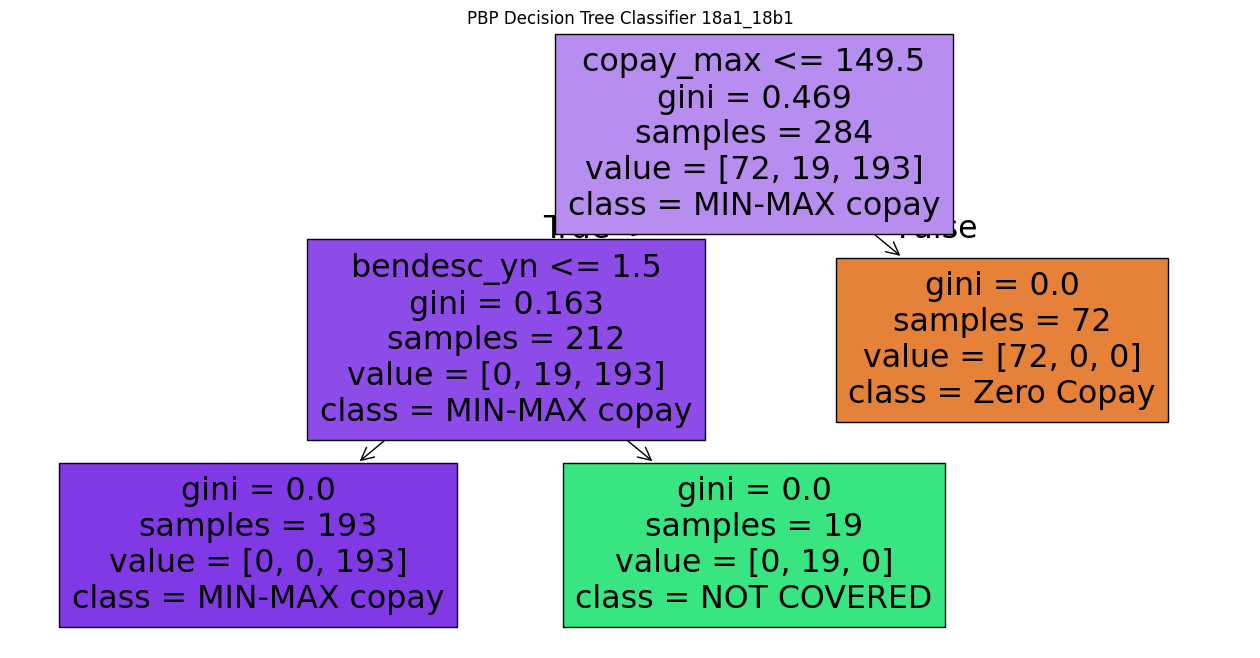

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree classifier
clf = clf.fit(x, y)


unique_Classified_CostShare =  df_all_samples['Classified_CostShare']
unique_Classified_CostShare.drop_duplicates(inplace=True)
uniqud_classified_costshare = unique_Classified_CostShare.to_list()

print(uniqud_classified_costshare)
print(feature_cols)
# Plot the decision tree
plt.figure(figsize=(12, 12))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names=uniqud_classified_costshare)
title = f"PBP Decision Tree Classifier {benefits_service_codes}"
plt.title(title)
# Save the plot as an image file (e.g., PNG)
plt.savefig( title + '.png', dpi=300)  # Adjust the filename and DPI as desired

plt.show(title)